# Lead Score - Case Study

## Problem Statement

Industry professionals can purchase online courses from X Education, a company that provides education. Several experts who are interested in the courses visit their website on any given day and search for courses.

On numerous websites and search engines like Google, the firm advertises its courses. When arriving at the website, these visitors may browse the courses, submit a form for the course, or watch some videos. These persons are categorised as leads when they fill out a form with their phone number or email address. Also, the business receives leads from earlier recommendations. Once these leads are obtained, sales team members begin calling, sending emails, etc.Some leads are converted during this procedure, but most are not. At X Education, the normal lead conversion rate is roughly 30%.

In the beginning, a lot of leads are generated, but very few of them end up becoming paying clients. To increase lead conversion, you must properly nurture the potential leads during the middle stage (e.g., by educating the leads about the product and maintaining ongoing communication).

You have been asked by X Education to assist them in choosing the leads that have the best chance of becoming paying clients. The business wants you to create a model in which you give each lead a lead score so that leads with higher lead scores have a better chance of converting, while leads with lower lead scores have a lesser chance of converting. The desired lead conversion rate has been estimated by the CEO to be in the range of 80%.

## Goals and Objectives
This case study has a lot of objectives.

- Create a logistic regression model to provide each lead a lead score between 0 and 100 that the business may use to target potential prospects. In contrast, a lower number would indicate that the lead is chilly and unlikely to convert, while a higher score would indicate that the lead is hot and most likely to convert.

## Dataset characteristics
Leads.csv have the following fields:

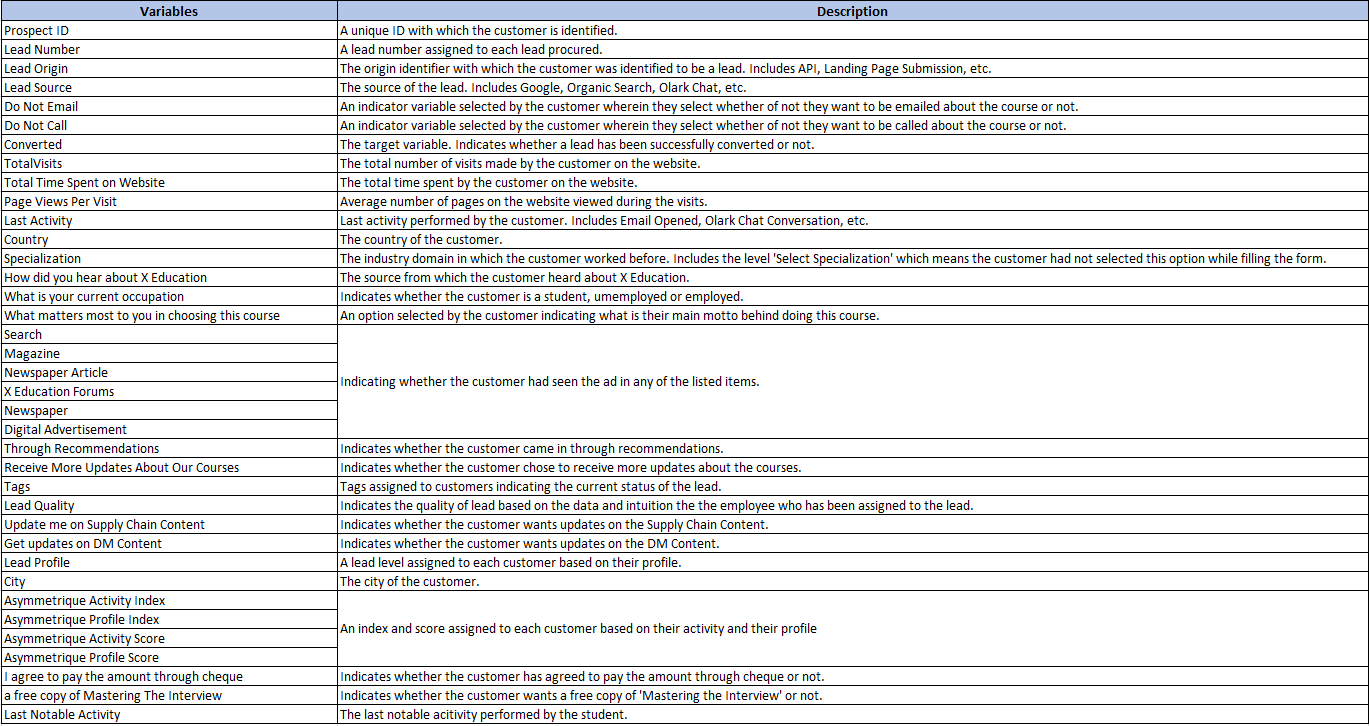

## Importing Necessary Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)
import warnings
warnings.filterwarnings("ignore")

## Step-1: Reading And Understanding Data

### Reading data

In [2]:
#importing the data
df_lead = pd.read_csv('Leads.csv')
df_lead.shape

(9240, 37)

In [3]:
#checking top few rows
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking the info
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df_lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
#checking the spread of the data
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df_lead.describe(include = ['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


It is observed that many columns have just one unique value. Hence, these columns do not provide any help in indentifying hot leads.

## Step-2: Data Cleaning

###  1) Dropping unecessary columns

In [8]:
# Dropping columns that have only one unique values for all the leads.
cols = []
for i in df_lead.columns:
    if df_lead[i].nunique() ==1:
        cols.append(i)
df_lead.drop(cols, axis =1,inplace = True)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [9]:
df_lead.shape

(9240, 32)

In [10]:
# Checking the percentage of missing values
round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Dropping Prospect ID and will keep Lead Number for identification of the lead.
df_lead = df_lead.drop(['Prospect ID'], 1)
df_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [12]:
df_lead.shape

(9240, 31)

In [13]:
# Removing the columns that are not required and have 35% null values
cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']
df_lead.drop(cols, axis = 1, inplace = True)

In [14]:
df_lead.shape

(9240, 29)

###  2) Dealing with uncertain values of the Leads CSV Data

I can see that the dataset contains many columns with values like 'Select'. This is shown as selected because the customer did not select an option from the list. It cannot be left selected for two reasons:

1. Ambiguity arose as there were insufficient choices to choose from. So this can be classified as other.
2. An error occurred during data entry. It is recommended to attribute them as Nan , as any other method of attribution will confuse the data. 

In [15]:
# Columns having select values
df_lead.columns[df_lead.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

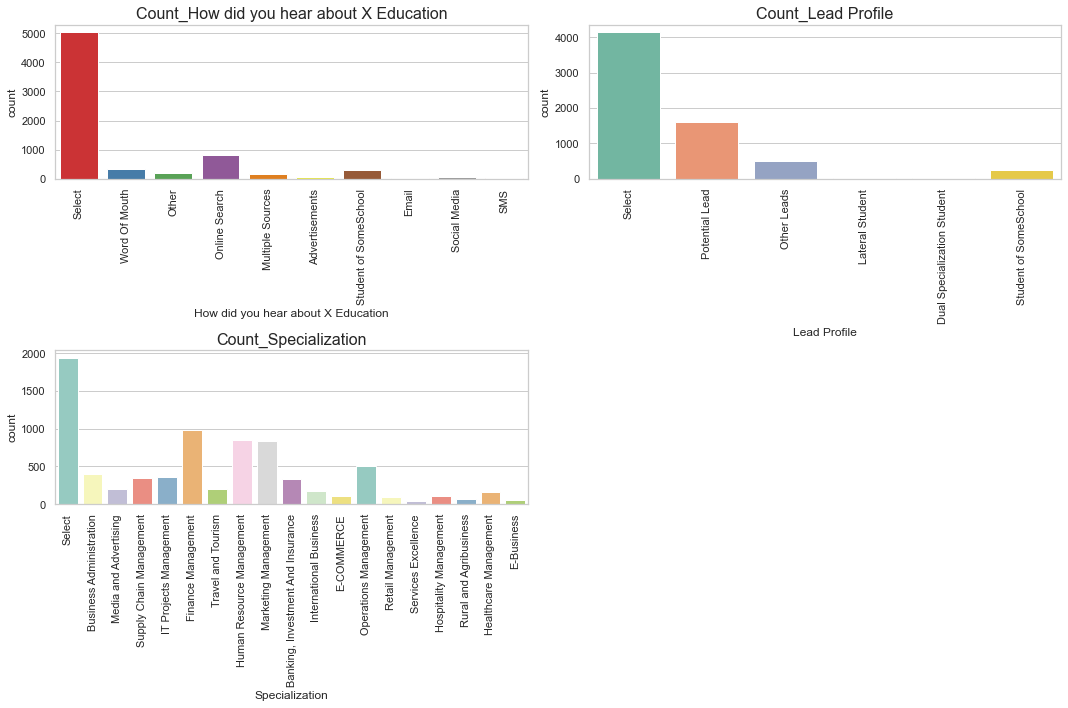

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x ='How did you hear about X Education', data = df_lead, palette = "Set1")
plt.title('Count_How did you hear about X Education', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x ='Lead Profile', data = df_lead, palette = "Set2")
plt.title('Count_Lead Profile', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(x ='Specialization', data = df_lead, palette = "Set3")
plt.title('Count_Specialization', fontsize=16)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

You can see that all three columns have the select category has the maximum counts. Let us impute this select value for each column

In [17]:
# Consider Specialization column and impute them with Nan values as we are unsure about specialization for many leads
df_lead['Specialization'].value_counts()
df_lead['Specialization'] = df_lead['Specialization'].replace('Select', np.nan)

In [18]:
# Similary consider `How did you hear about X Education` column
df_lead['How did you hear about X Education'].value_counts()
df_lead['How did you hear about X Education'] = df_lead['How did you hear about X Education'].replace('Select',np.nan)

In [19]:
# Similarly consider `City` column
df_lead['City'].value_counts()
df_lead['City']= df_lead['City'].replace('Select',np.nan)

In [20]:
# Similarly consider `Lead Profile` column
df_lead['Lead Profile'].value_counts()
df_lead['Lead Profile']= df_lead['Lead Profile'].replace('Select',np.nan)

###  3) Checking for Missing values

In [21]:
#checking for null values
df_lead.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [22]:
#checking for percentage of missng values
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Lead Numbe

We can see that the dataset has many missing values. Columns with more than 50% missing data do not help explaining the leads. So let's drop them. The remaining missing values can be handled by replacing them with either mean or mode. 

In [23]:
#Dropping the columns which have more than 40% missing values
df_lead.drop(df_lead.loc[:,list(round((df_lead.isnull().sum()/len(df_lead.index)*100),2)>40)].columns,axis =1, inplace = True)

In [24]:
#checking if there any rows which have more than 50% missing values
df_lead[df_lead.isnull().sum(axis = 1) > 14]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


In [25]:
df_lead.shape

(9240, 24)

###  4) Imputing Null Values

In [26]:
#checking for percentage of missng values
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

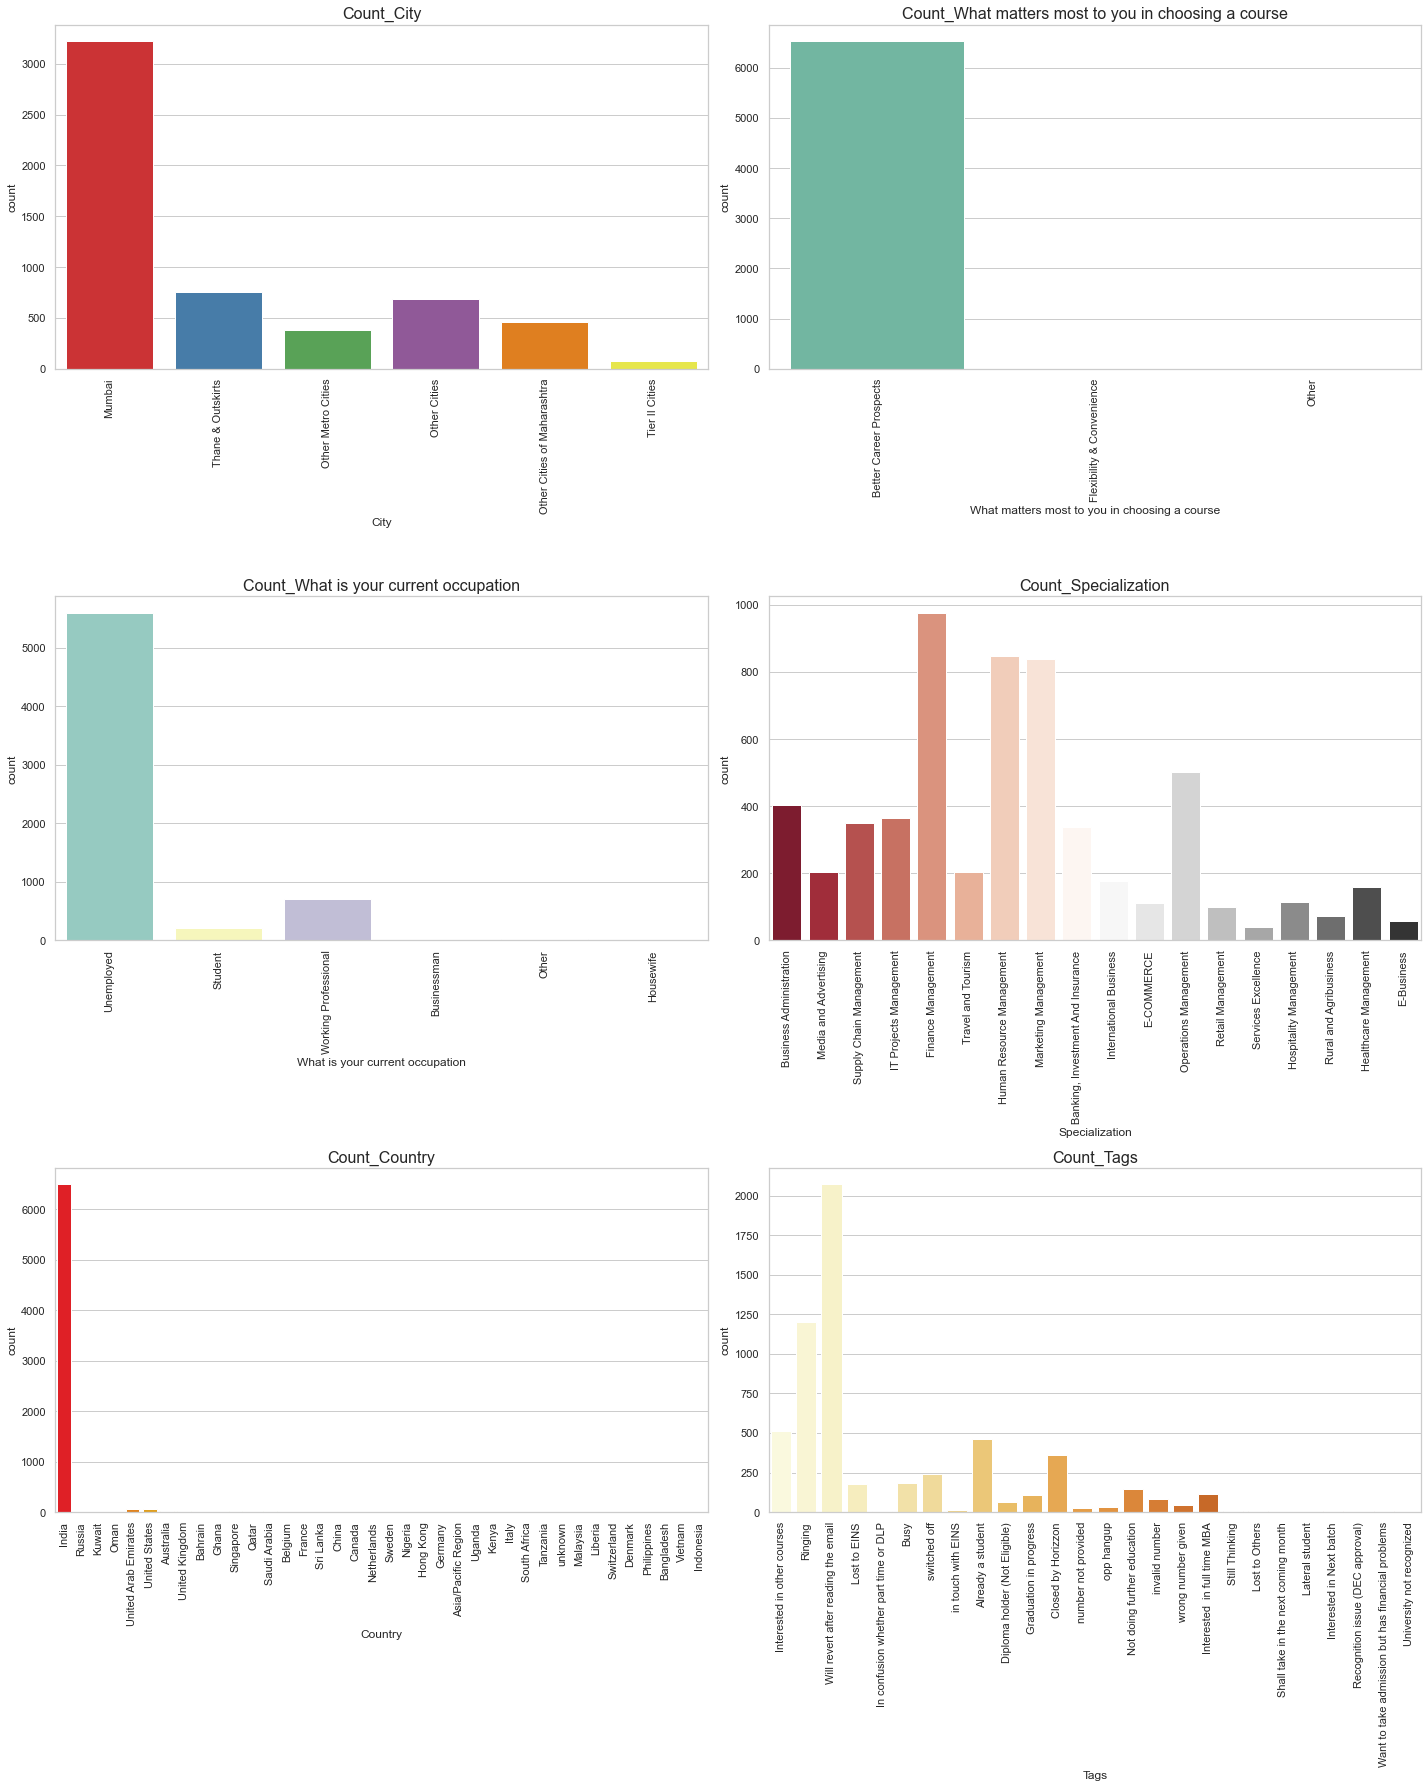

In [27]:
plt.figure(figsize=(20,25))

plt.subplot(3,2,1)
sns.countplot(x ='City', data = df_lead, palette = "Set1")
plt.title('Count_City', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(3,2,2)
sns.countplot(x ='What matters most to you in choosing a course', data = df_lead, palette = "Set2")
plt.title('Count_What matters most to you in choosing a course', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(3,2,3)
sns.countplot(x ='What is your current occupation', data = df_lead, palette = "Set3")
plt.title('Count_What is your current occupation', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(3,2,4)
sns.countplot(x ='Specialization', data = df_lead, palette = "RdGy")
plt.title('Count_Specialization', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(3,2,5)
sns.countplot(x ='Country', data = df_lead, palette = "gist_rainbow")
plt.title('Count_Country', fontsize=16)
plt.xticks(rotation = 90)

plt.subplot(3,2,6)
sns.countplot(x ='Tags', data = df_lead, palette = "YlOrBr")
plt.title('Count_Tags', fontsize=16)
plt.xticks(rotation = 90)


plt.tight_layout()
plt.show()

**Insights:**
1. From the city count table, we can see that the largest ones are led from Mumbai.
2. Most of the contacts are from India.
3. Most managers specialize in financial management, personnel, and production management.
4. For most potential clients, the most important thing when choosing a course is to have better career prospects.
5. Most of the leads were customers marked as -will return after reading the email letter.
6. The current employment of the largest potential leads is Unemployed. 

In [28]:
# Checking value counts of "City" column
df_lead['City'].value_counts(dropna=False)
df_lead['City'].fillna(df_lead.City.mode()[0],inplace = True)
print("No. of Missing values after Imputing City Column :",df_lead['City'].isnull().sum())

No. of Missing values after Imputing City Column : 0


In [29]:
# Checking value counts of "What matters most to you in choosing a course" column
df_lead['What matters most to you in choosing a course'].value_counts(dropna=False)
df_lead['What matters most to you in choosing a course'].fillna(df_lead['What matters most to you in choosing a course'].mode()[0],inplace = True)
print("No. of Missing values after Imputing 'What matters most to you in choosing a course' Column is :",df_lead['What matters most to you in choosing a course'].isnull().sum())

No. of Missing values after Imputing 'What matters most to you in choosing a course' Column is : 0


In [30]:
# Checking value counts of "What is your current occupation" column
df_lead['What is your current occupation'].value_counts(dropna=False)
df_lead['What is your current occupation'].fillna(df_lead['What is your current occupation'].mode()[0],inplace = True)
print("No. of Missing values after Imputing 'What is your current occupation' Column, is :",df_lead['What is your current occupation'].isnull().sum())

No. of Missing values after Imputing 'What is your current occupation' Column, is : 0


In [31]:
df_lead['Specialization'].value_counts()

# Let's group all management specialties into one category called 'Management'. 
Lead_manage = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df_lead['Specialization'] = df_lead['Specialization'].replace(Lead_manage,'Management')

# Let us replace E-Commerce specialisations with E-Business.
df_lead['Specialization'] = df_lead['Specialization'].replace('E-COMMERCE','E-Business')

In [32]:
df_lead['Specialization'].value_counts(dropna=False)

# Since specialization is something that customer didn't filled while filling the form so we cannot blindly impute it with mode.Hence we decide to make a new category as others  based on our intution
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan,'Others')
print("No. of Missing values after Imputing Specialization Column, is :",df_lead['Specialization'].isnull().sum())

No. of Missing values after Imputing Specialization Column, is : 0


In [33]:
# Check null percentage
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False).head()

Tags                    36.29
Country                 26.63
TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
dtype: float64

In [34]:
df_lead['Tags'].value_counts(dropna = False)

#Tags assigned to customers indicate the current status of the lead. Let us group all the similar tags in one category
df_lead['Tags'] = df_lead['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
df_lead['Tags'] = df_lead['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df_lead['Tags'] = df_lead['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df_lead['Tags'] = df_lead['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [35]:
# Let us observe the the value counts again
df_lead['Tags'].value_counts(dropna = False)

# We can assume that the customer is not interested and may come back later. So, we can impute this column by mode. 
df_lead['Tags'] = df_lead['Tags'].replace(np.nan,'Others')
print("No. of Missing values after Imputing Tags Column, is :",df_lead['Tags'].isnull().sum())

No. of Missing values after Imputing Tags Column, is : 0


In [36]:
# Let us now treat the country column
df_lead['Country'].value_counts(dropna = False)

# Selecting the mode imputation for country
df_lead['Country'].fillna(df_lead.Country.mode()[0],inplace = True)
print(" No. of Missing values after Imputing Country Column, is :",df_lead['Country'].isnull().sum())

 No. of Missing values after Imputing Country Column, is : 0


In [37]:
# Check the null percentage
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [38]:
df_lead['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [39]:
# Let's group all recent activities with very low counts into one category as "Other". There are very few of them, so grouping them into one category is useful for analysis. 
combine =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
df_lead['Last Activity'] = df_lead['Last Activity'].replace(combine,'others')

In [40]:
df_lead['Last Activity'].value_counts(dropna = False)

# Imputation for 'Last Activity' column
df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan,'Others')
print("No. of Missing values after Imputing Last Activity Column, is :",df_lead['Last Activity'].isnull().sum())

No. of Missing values after Imputing Last Activity Column, is : 0


In [41]:
# Check the null percentage
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Lead Source             0.39
Lead Number             0.00
Search                  0.00
dtype: float64

In [42]:
# Check the column Lead Source
df_lead['Lead Source'].value_counts(dropna = False)

# Club similar categories to avoid confusion
df_lead['Lead Source'] = df_lead['Lead Source'].replace('google','Google')
df_lead['Lead Source'] = df_lead['Lead Source'].replace('Facebook','Social Media')

# Combine sources that have less value counts to simplify our analysis.
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df_lead['Lead Source'] = df_lead['Lead Source'].replace(less_count,'Others')

In [43]:
# Imputation of 'Lead source' column
df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan,'Others')
print("No. of Missing values after Imputing Lead Source Column, is :",df_lead['Lead Source'].isnull().sum())

No. of Missing values after Imputing Lead Source Column, is : 0


In [44]:
# Check the null percentage
round((df_lead.isnull().sum()/len(df_lead.index) *100),2).sort_values(ascending = False).head()

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Number                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [45]:
# We choose to drop these rows as they are very less (nearly 2%)
print("Shape of data before dropping rows ",df_lead.shape)

a = df_lead.shape[0]
df_lead.dropna(inplace = True)
print("Shape of data after dropping rows ",df_lead.shape)
print("Percentage of Information Loss", round(100*((a-df_lead.shape[0])/a),2))

Shape of data before dropping rows  (9240, 24)
Shape of data after dropping rows  (9103, 24)
Percentage of Information Loss 1.48


In [46]:
# Checking missing values in leftover columns
round(100*(df_lead.isnull().sum()/len(df_lead.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### 5) Data type correction

In [47]:
# We obsserve that TotalVisits have wrong data type
df_lead['TotalVisits'] = df_lead['TotalVisits'].astype('int64')

### 6) Further simplification of analysis

In [48]:
# Checking value counts of last Notable Activity
df_lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [49]:
# Round up all the categories with little notable recent activity 
Less_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
df_lead['Last Notable Activity'] = df_lead['Last Notable Activity'].replace(Less_count,'Other')

# checking value counts of last Notable Activity
df_lead['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: Last Notable Activity, dtype: int64

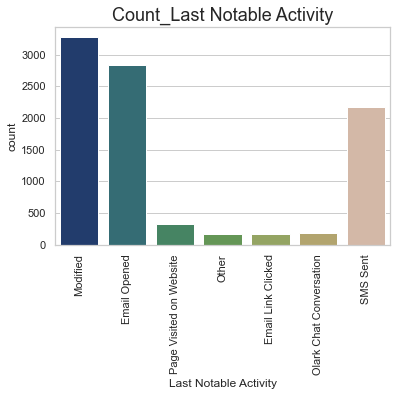

In [50]:
# Visualize this 'Last Notable Activity' column
sns.countplot(df_lead['Last Notable Activity'],palette = "gist_earth")
plt.title('Count_Last Notable Activity', size = 18)
plt.xlabel('Last Notable Activity',size = 12)
plt.xticks(rotation = 90)
plt.show()

***Now our Data is clean and we are good to go for next step.***

## Step-3: Data Visualization and Outlier Treatment

#### 1. Check spread of Numerical columns

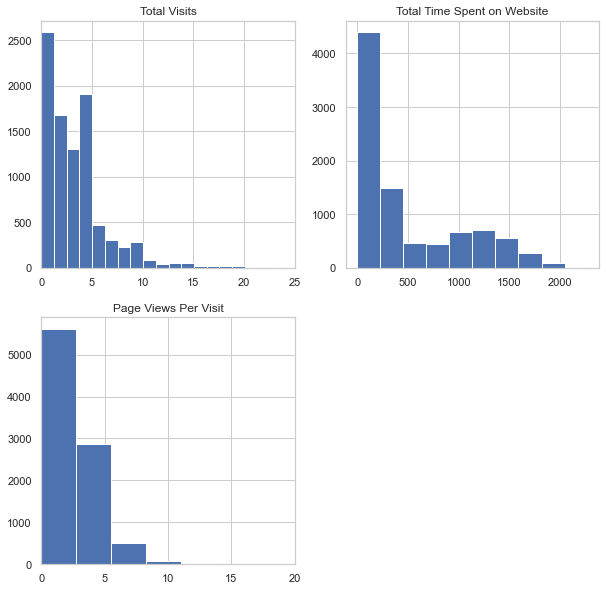

In [51]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_lead['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_lead['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_lead['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

We observe that our data is skewed.

In [52]:
# Checking Data imbalance
round(((sum(df_lead['Converted'])/len(df_lead.index))*100),2)

38.02

We can see that only 38% of leads are converted and 62% are not converted. There is data imbalance in the dataset. Data refer to unconverted leads.

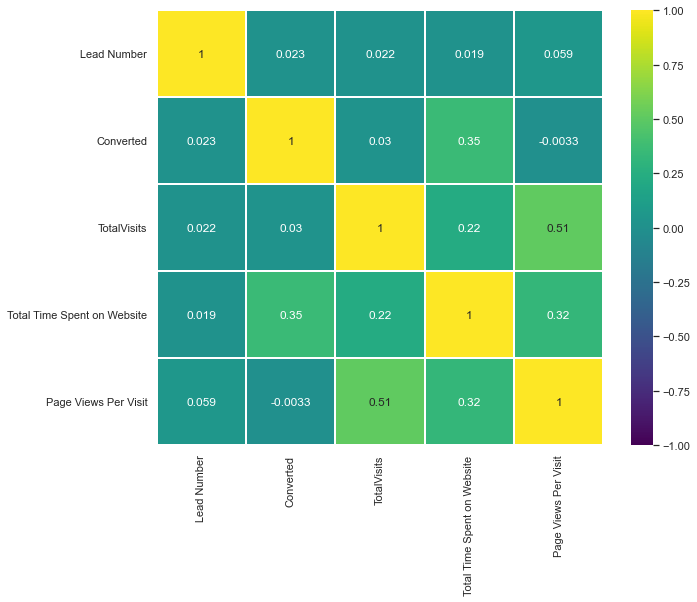

In [53]:
# look at the correaltion between continous varibales using heat map
plt.figure(figsize=(10,8))
sns.heatmap(df_lead.corr(), annot=True, cmap="viridis", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

We can observe that the variables are not highly correlated with each other.

#### 2. Visualizing categorical columns

In [54]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9103 non-null   int64  
 1   Lead Origin                                    9103 non-null   object 
 2   Lead Source                                    9103 non-null   object 
 3   Do Not Email                                   9103 non-null   object 
 4   Do Not Call                                    9103 non-null   object 
 5   Converted                                      9103 non-null   int64  
 6   TotalVisits                                    9103 non-null   int64  
 7   Total Time Spent on Website                    9103 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9103 

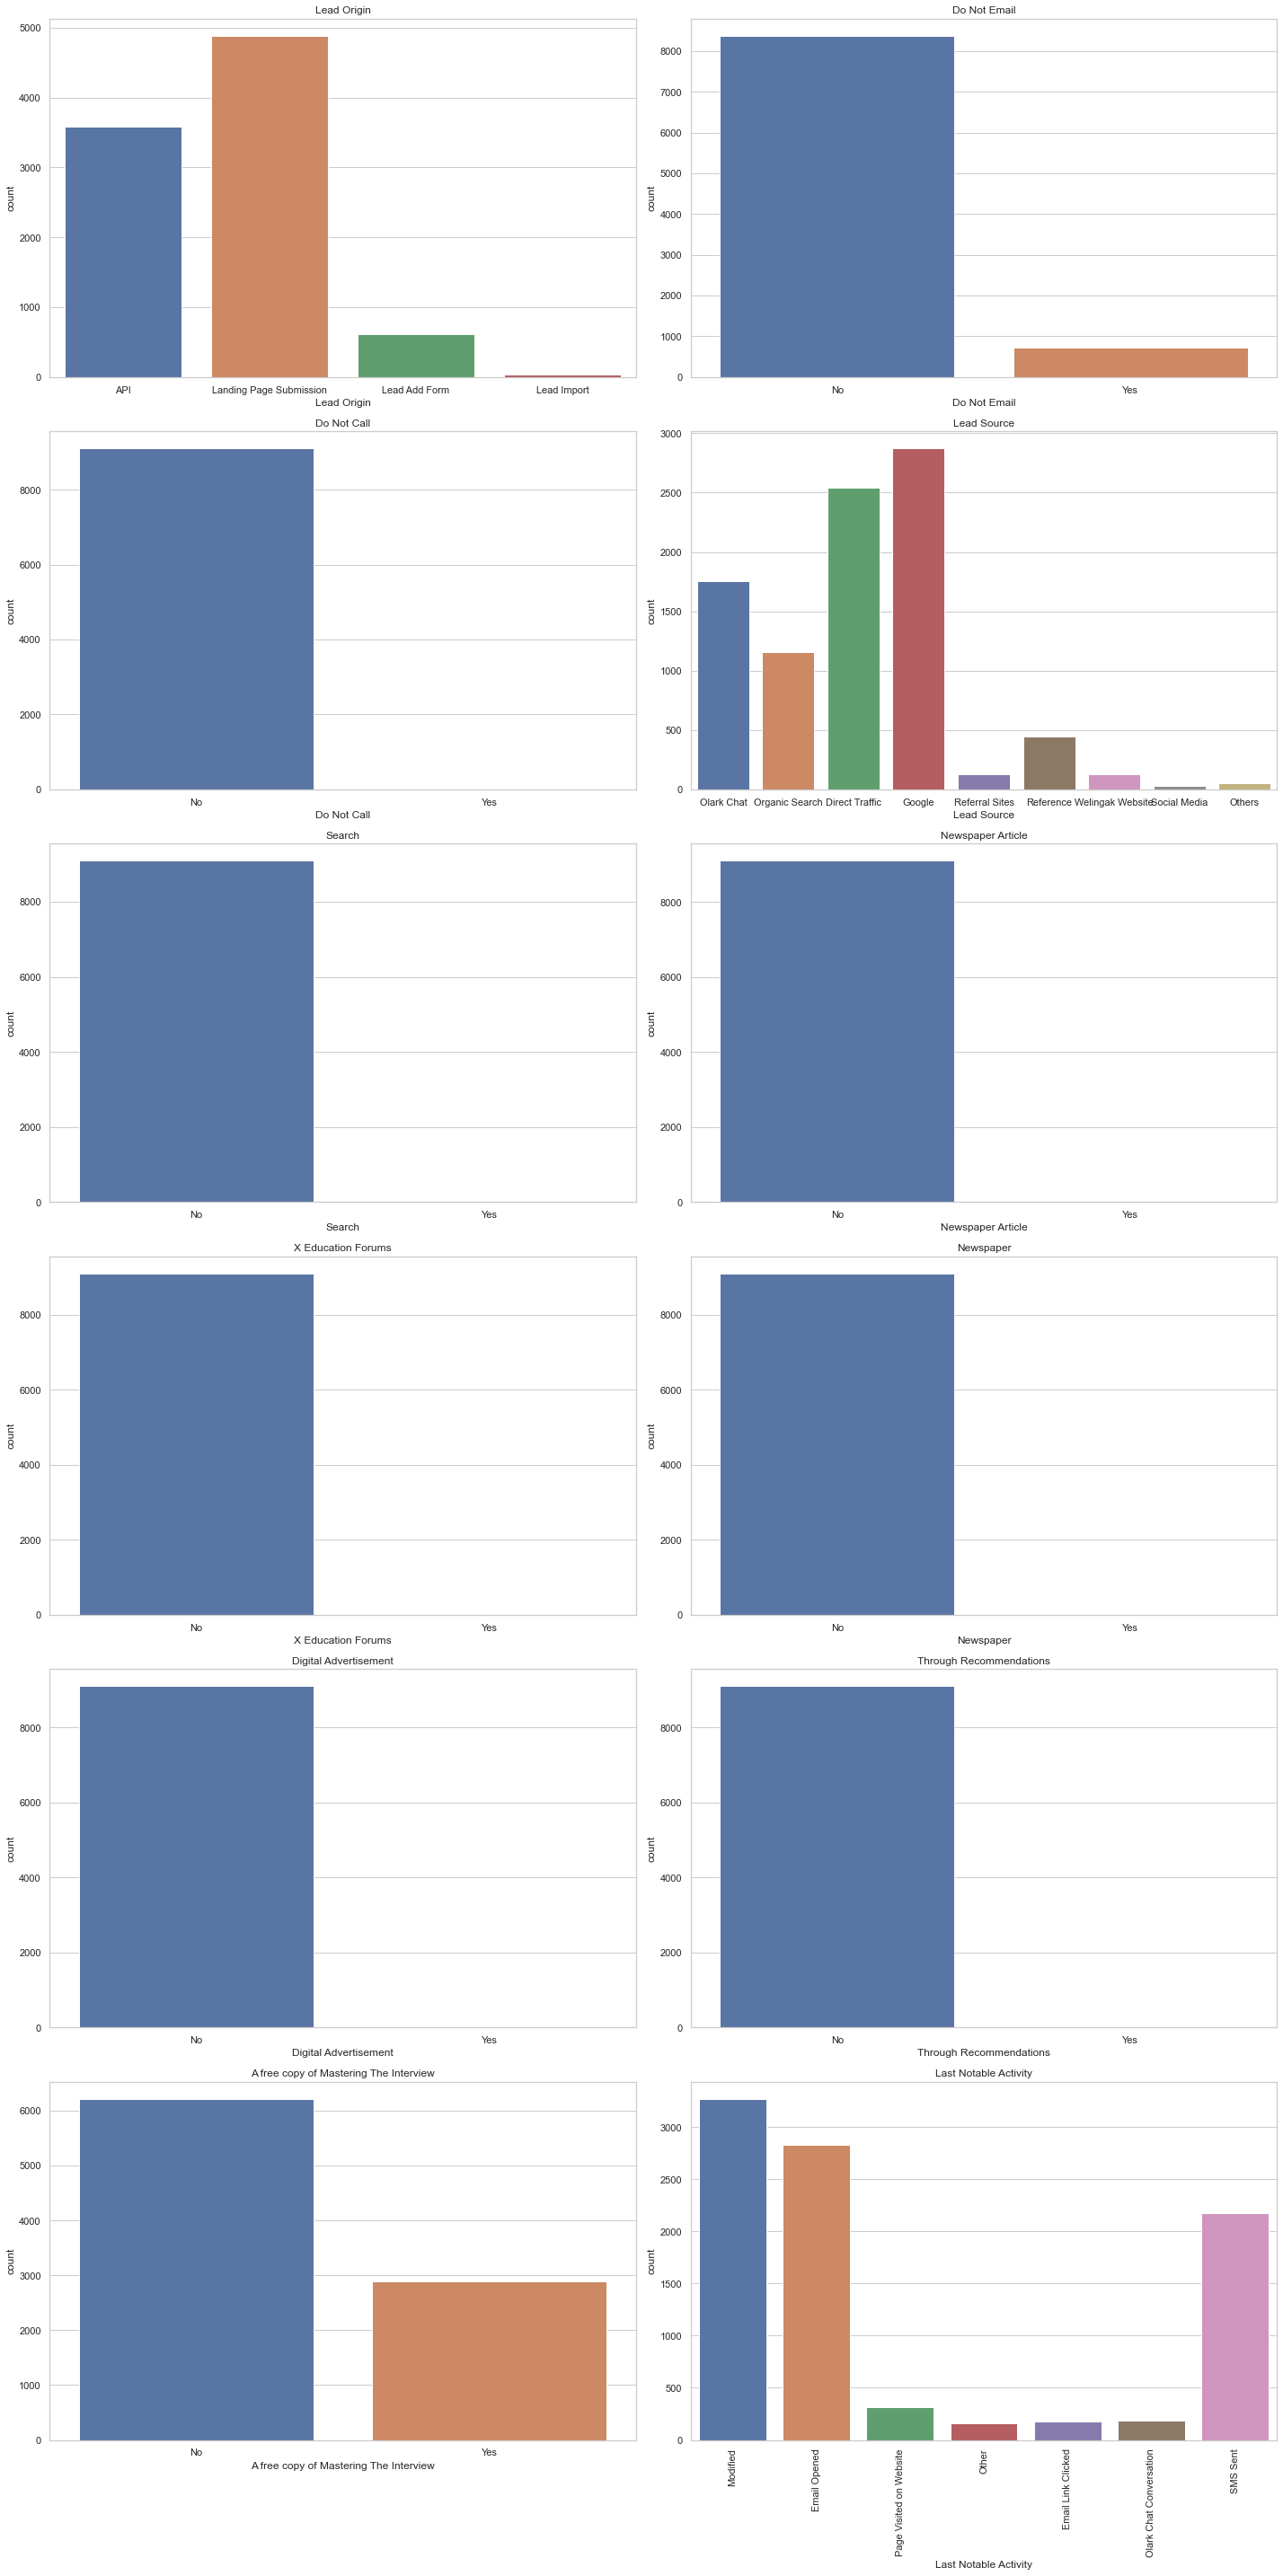

In [55]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_lead['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_lead['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_lead['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_lead['Lead Source'])
plt.title('Lead Source')

plt.subplot(6,2,5)
sns.countplot(df_lead['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_lead['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_lead['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_lead['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_lead['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_lead['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_lead ['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_lead['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.tight_layout()
plt.show()

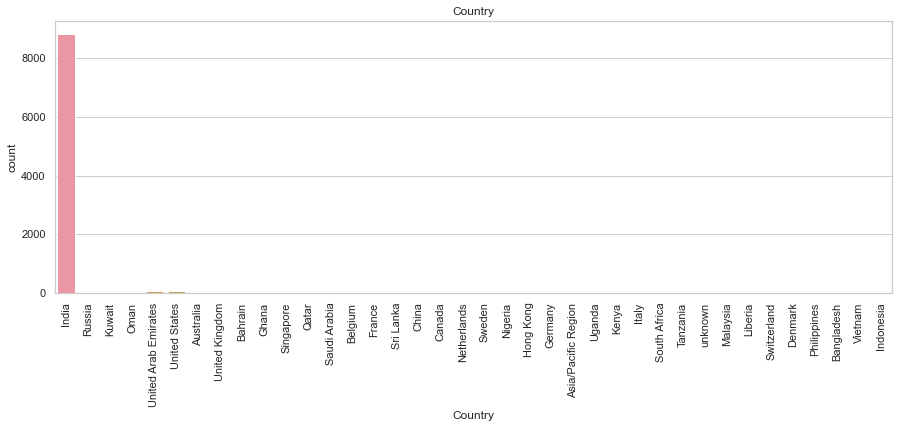

In [56]:
plt.figure(figsize = (15,5))
sns.countplot(df_lead['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

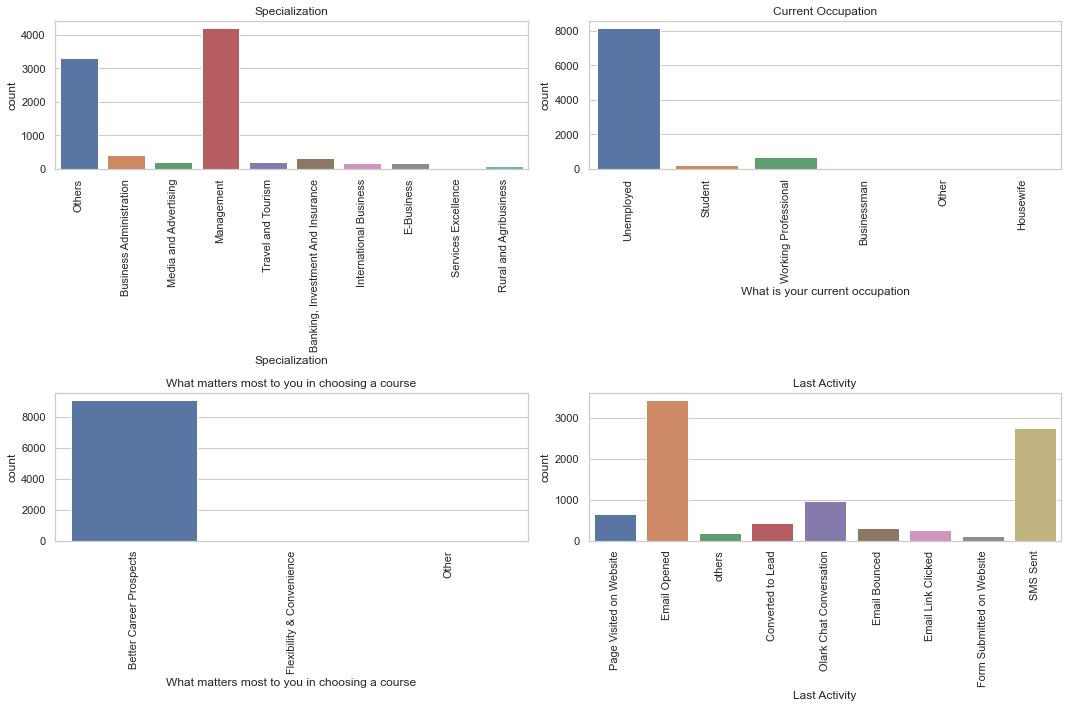

In [57]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(df_lead['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(df_lead['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(df_lead['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(df_lead['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.tight_layout()
plt.show()

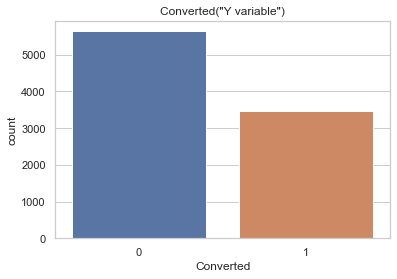

In [58]:
sns.countplot(df_lead['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1 Relating all the Categorical Variables to Converted

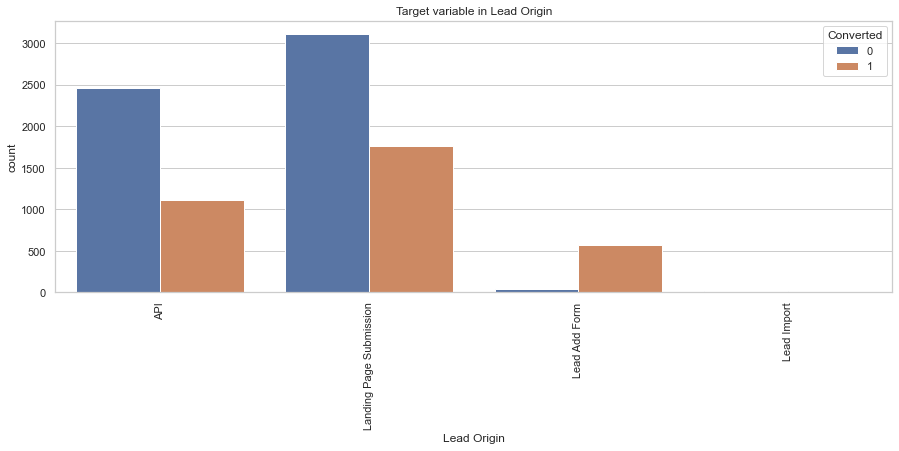

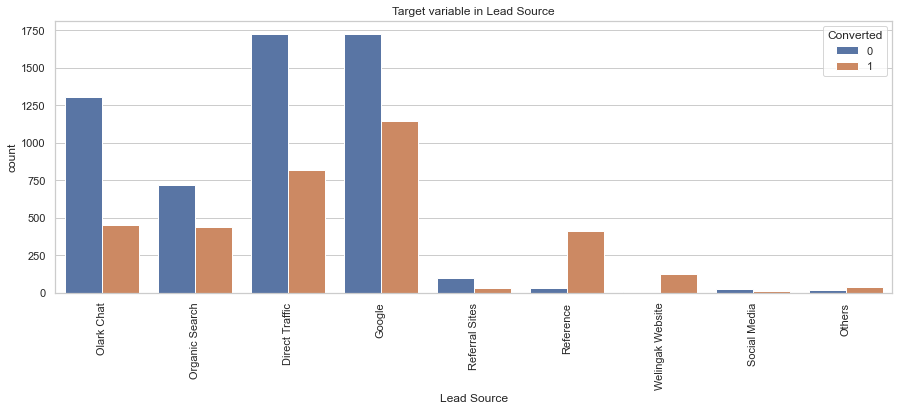

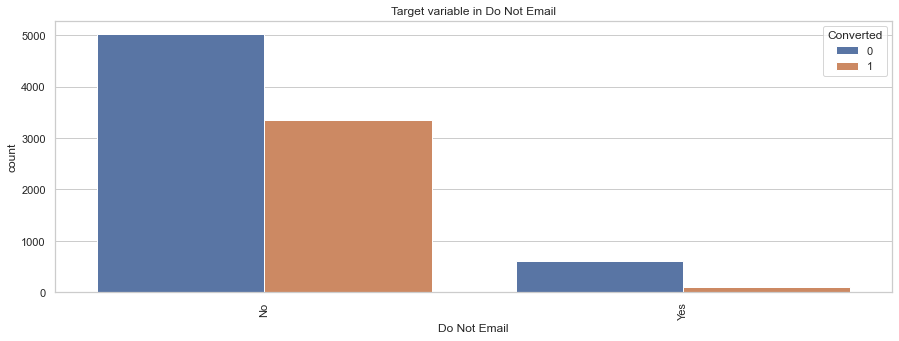

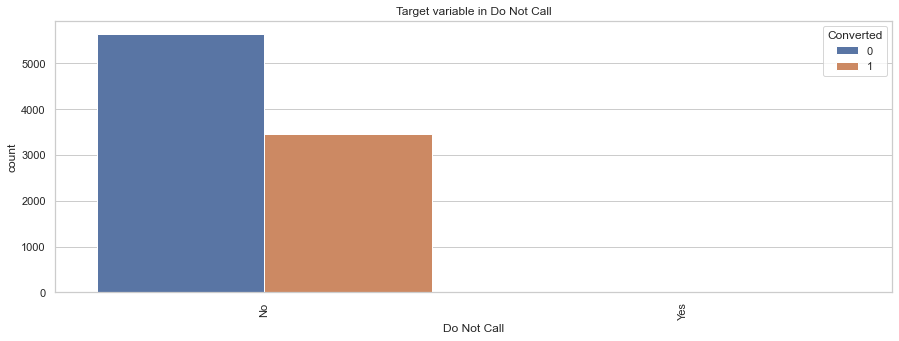

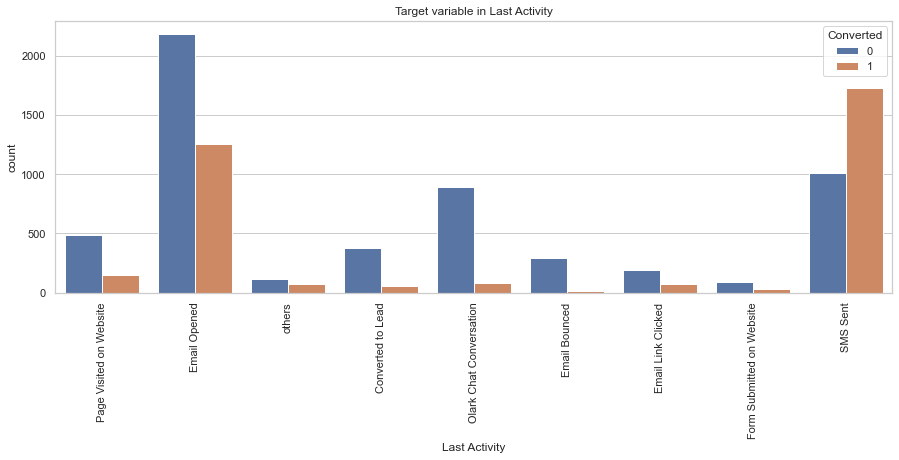

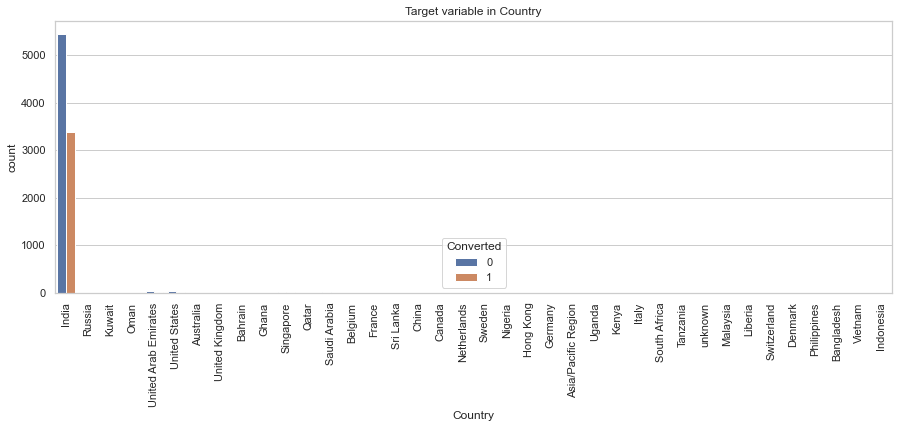

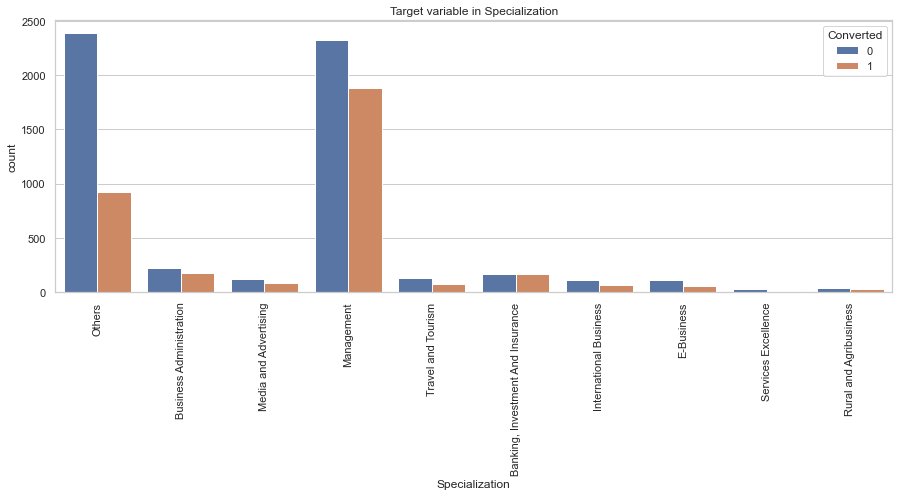

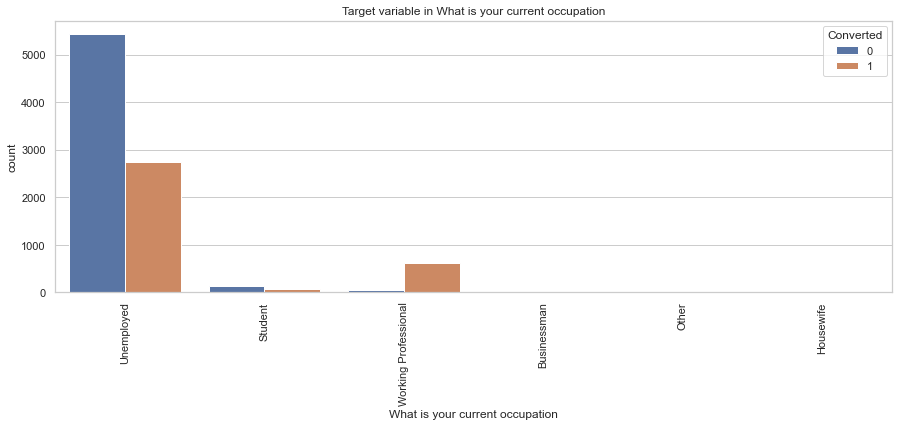

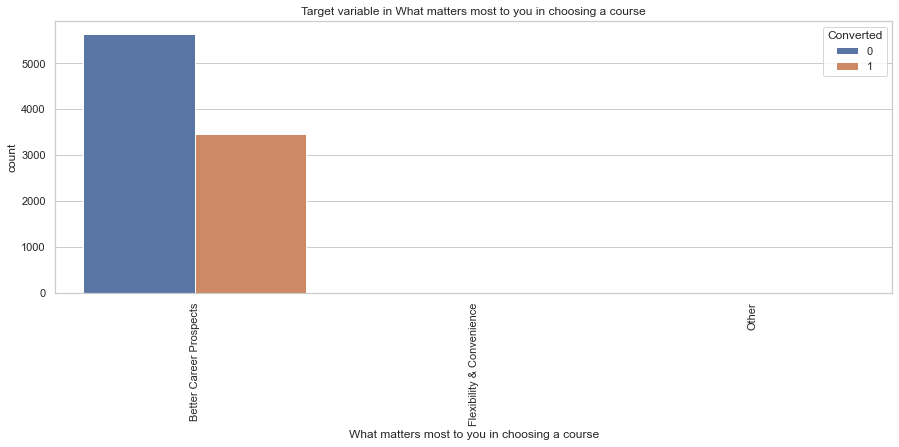

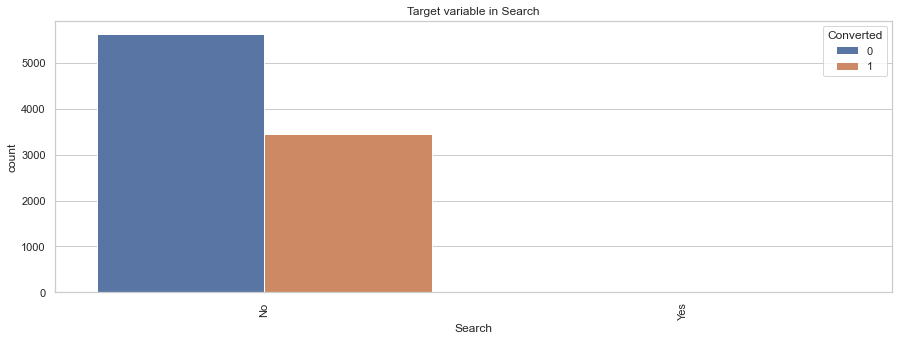

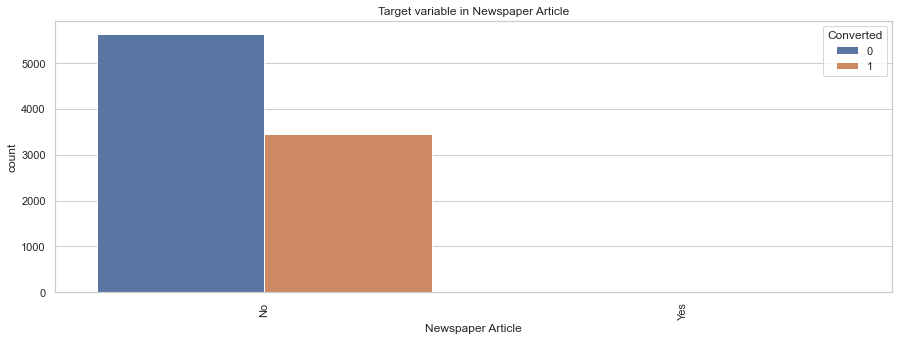

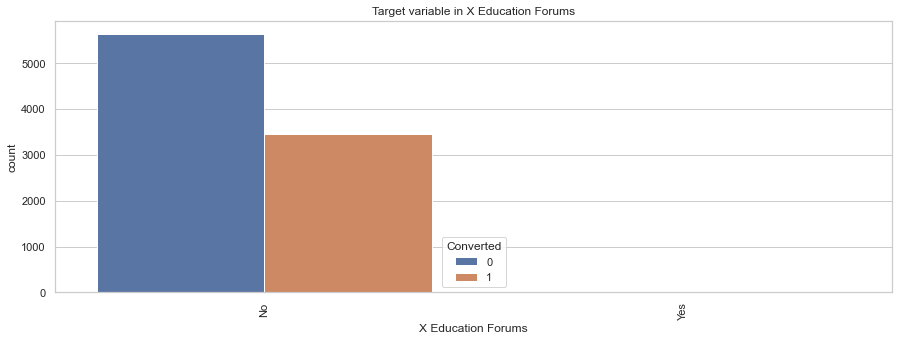

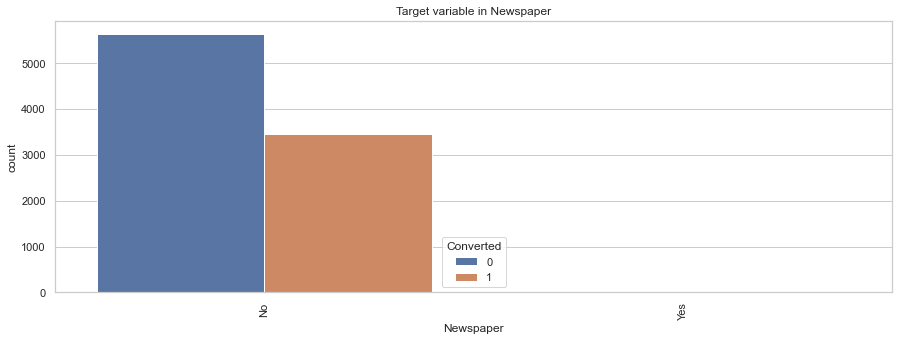

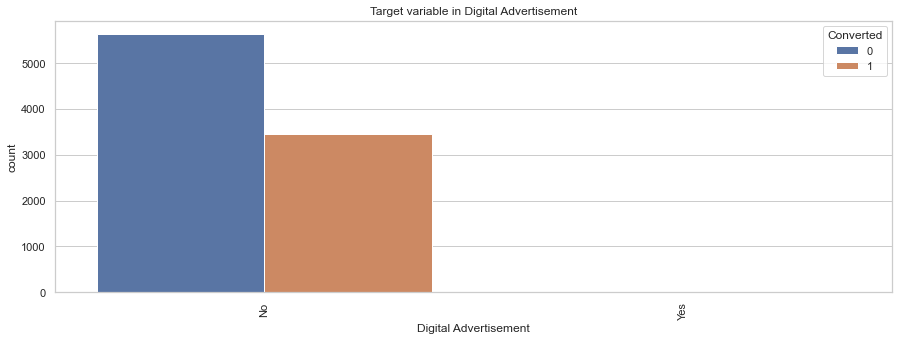

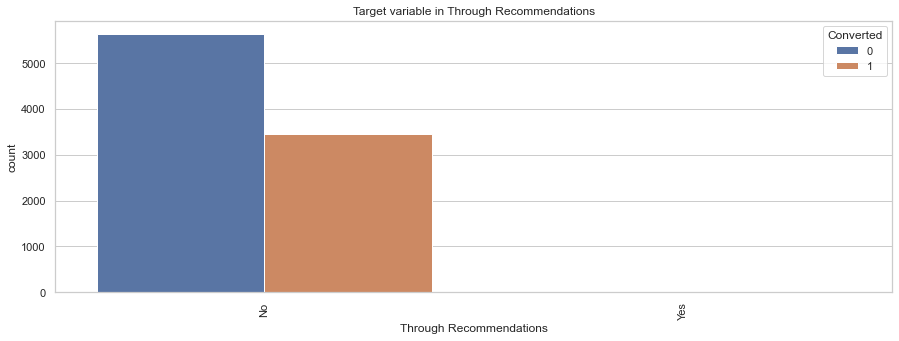

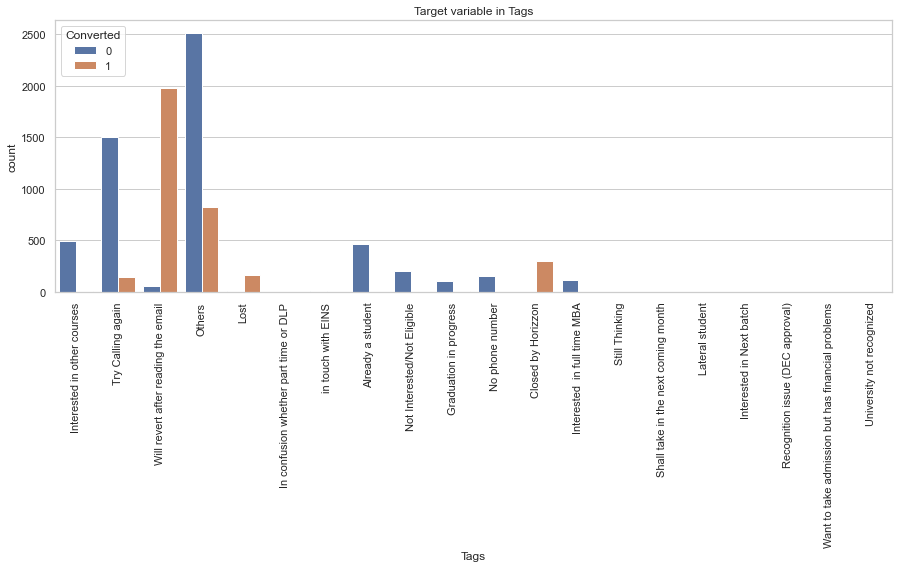

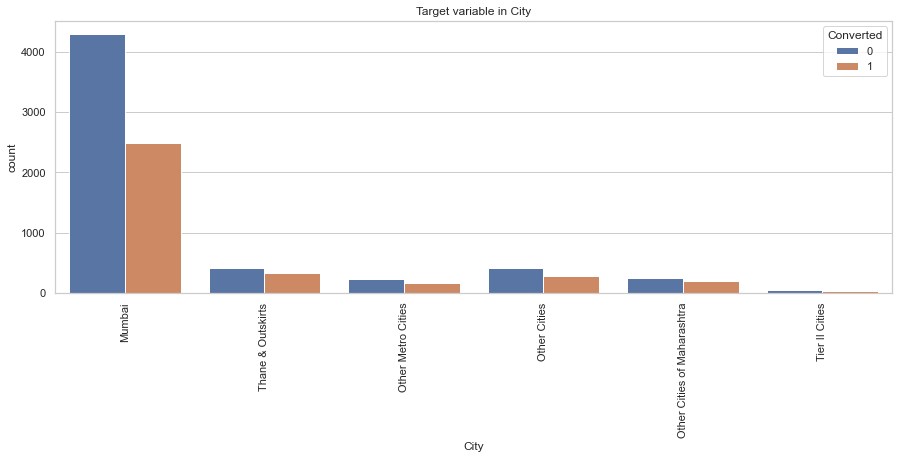

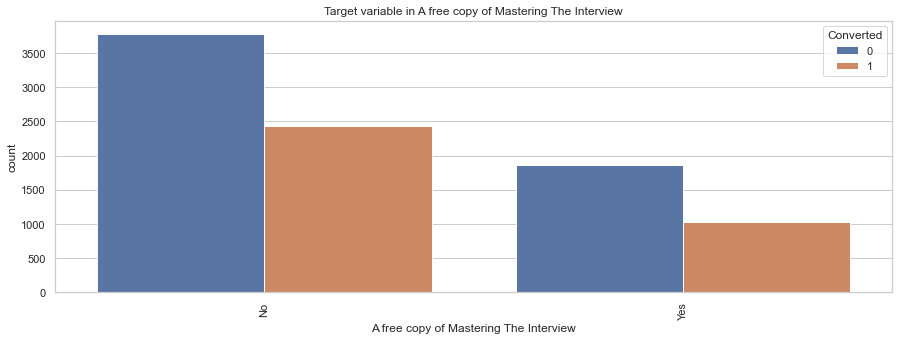

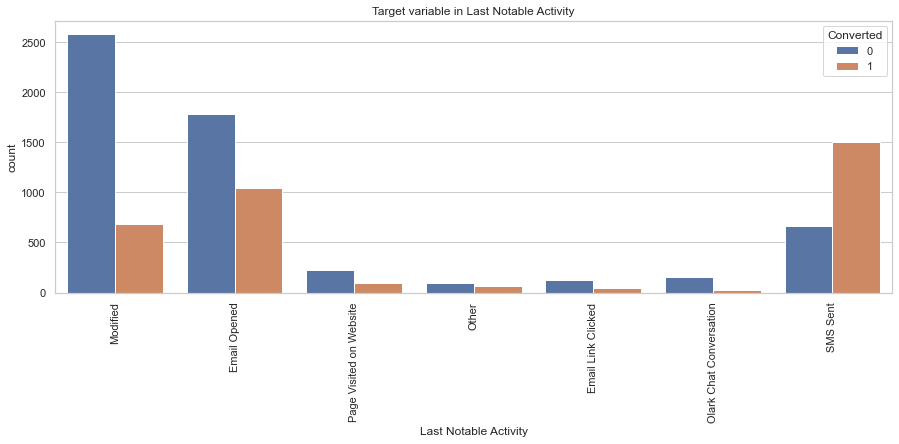

In [59]:
conv = df_lead.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(df_lead[i], hue=df_lead.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

**Insights:**

- ***Lead Origin:***
  - Customers identified as leads through landing page submissions make up the majority of leads.
  - Customers from lead add forms are more likely to convert. These customers are very few.
  -  Lead Origin API and Lead Import have the lowest conversion rates. Lead Import has very few customers.

To improve your overall lead conversion rate, you need to focus more on improving customer lead conversion rates that come from API and landing page submissions, as well as more leads from lead add generation forms. 

- ***Do Not Call:***
  - Customers who don't choose "Don't Call" have a high conversion rate of about 38%. These make up the bulk of the leads .


- ***Last Activity:***
   - Customers whose last activity was SMS have higher conversion rates, around 63%. 
   - The majority of customers whose last activity was opening an email have a conversion rate of around 36%.


- ***Lead Source:***
  - The main sources of leads are Google and direct traffic. 
  - Lead sources from Google have the highest conversion rates. 
  - Leads with attribution have the highest chance of a conversion.


- ***Do Not Email:***
  - Customers who choose Do Not Mail have lower conversion rates.
  - Customers who don't choose Do Not Mail have a higher conversion rate, around 40%. These make up the bulk of the leads.


To improve your overall lead conversion rate, focus more on improving lead conversion rates for customers whose last activity was opening an email, and get more leads from customers whose last activity was sending an SMS should be generated.

- ***Specialisation:***
  - Maximum Leads has management and other specializations.
  -  Leads that specialize in rural and agricultural businesses are least likely to convert.


- ***Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement:***
  - Very few customers have ever seen an advertisement for an educational company in any way. 
  - No meaningful insight can be derived from expressions that improve overall prospect conversion rates. 


- ***City:***
  - Most of the leads are from Mumbai city. Mumbai City customers are potential leads, so they need to be more targeted. 


- ***Tags:***
  - You need to pay more attention to your leads because they are potential leads and they have a high conversion rate so they will come back after reading your emails and other information. .


- ***What is your current occupation:***
  - The jobs of the biggest prospects are unemployed.
  - There are few leads for full-time housewives.


- ***What matters most to you in choosing a career:*** 
  - A better career aspect is most important when choosing a career, leading to a higher number of leads and a higher chance of conversion. 


- ***Last Notable Activity:***
  - More customers have their last notable activity changed.
  - Customers whose recent notable activity was sending an SMS are more likely to convert. 


- ***A Free Copy Of Mastering the Interview:***
  - Fewer customers ask for a free copy of the mastering interview, but conversion potential is similar for both types of customers  .


**Handling high data imbalance:**
From the above plots, We can observe that there is data imbalance in some columns. These will give biased results. Hence it is better to drop them:

1. 'Do Not Call', 'Newspaper Article', 'Country', 'Search', 'Newspaper','Through Recommendations'
2. 'What matters most to you in choosing a course', 'X Education Forums','Digital Advertisement',

In [60]:
# Dropping the column 'country'
imbalance_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
df_lead = df_lead.drop(imbalance_data,axis =1)

In [61]:
df_lead.shape

(9103, 15)

#### 3. Visualizing Numerical columns

#### 3.1 Outlier Analysis

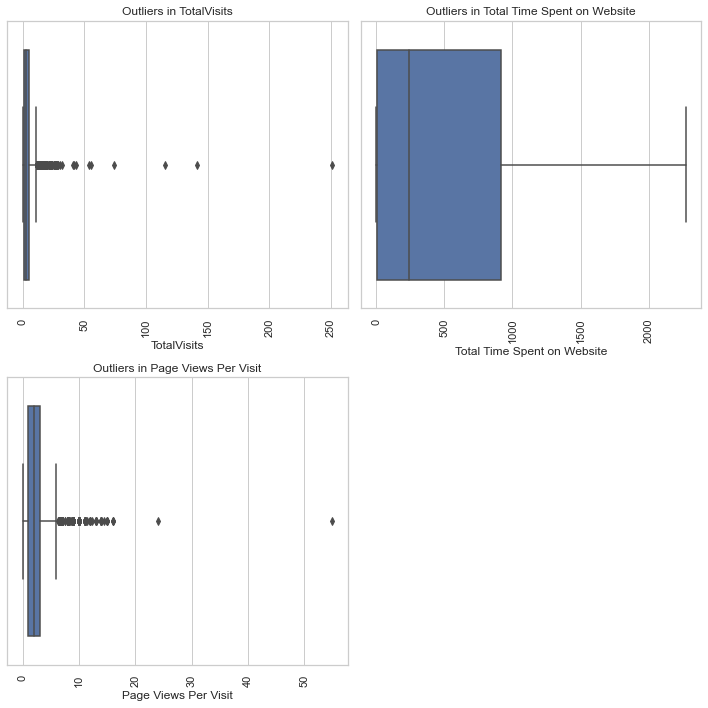

In [62]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = df_lead)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)
                         
plt.figure(figsize =(10,10))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

We observe some extreme values in:Total number of visits and pageviews per visit. Let's use statistical methods to check for outliers 

In [63]:
# Checking percentile values 
df_lead[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,481.350104,3.445238,2.362820
std,545.066142,4.854853,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000
50%,244.000000,3.000000,2.000000
75%,919.500000,5.000000,3.000000
90%,1372.000000,7.000000,5.000000


In [64]:
# Removing outliers using the IQR
Q1 = df_lead['Total Time Spent on Website'].quantile(0.01)
Q3 = df_lead['Total Time Spent on Website'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['Total Time Spent on Website'] >= Q1) & (df_lead['Total Time Spent on Website'] <= Q3)]

Q1 = df_lead['TotalVisits'].quantile(0.01)
Q3 = df_lead['TotalVisits'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['TotalVisits'] >= Q1) & (df_lead['TotalVisits'] <= Q3)]

Q1 = df_lead['Page Views Per Visit'].quantile(0.01)
Q3 = df_lead['Page Views Per Visit'].quantile(0.99)
df_lead = df_lead.loc[(df_lead['Page Views Per Visit'] >= Q1) & (df_lead['Page Views Per Visit'] <= Q3)]

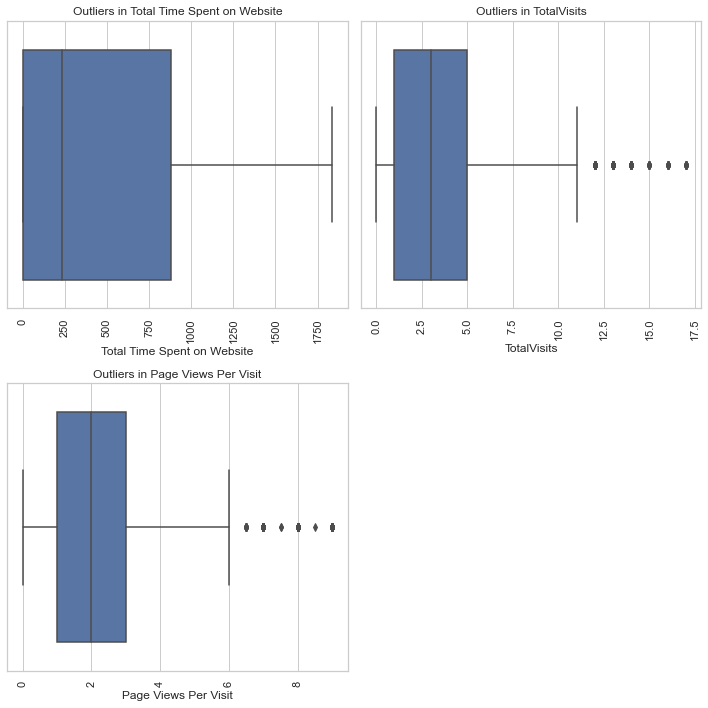

In [65]:
# Plotting outliers after treatment 
plt.figure(figsize =(10,10))
                         
boxplot('Total Time Spent on Website',1)
boxplot('TotalVisits',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [66]:
df_lead.shape

(8863, 15)

#### 3.2 Bivariate Analysis - Visualizing Numerical Columns with Target Column

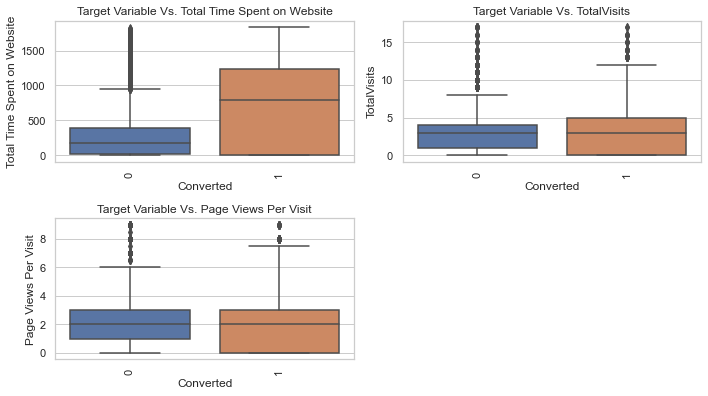

In [67]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df_lead)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)                       
plt.figure(figsize =(10,8))                        
boxplot('Total Time Spent on Website',1)
boxplot('TotalVisits',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

**Insights:**
1. Total Visits & Page Views Per Visit - Median for both types of Leads : converted and non converted are similar. - Nothing can be concluded from this. - Total Time Spent on Site - Prospects who spend more time on the X Education site are more likely to convert. 

## Step-4: Data Preparation and Feature Scaling

In [68]:
#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [69]:
# Creating a copy of our dataset before proceeding with dummy creations
df_new_lead = df_lead.copy()

#Converting Binary variables yes/No to 0 or 1
def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [70]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
df_new_lead[cols] = df_new_lead[cols].apply(binary_map)

In [71]:
df_new_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [72]:
# Create a dummy variable for the categorical variable and remove the first variable 
cols1 = [i for i in df_new_lead.select_dtypes(include ='object').columns if len(df_new_lead[i].value_counts()) >2 and i != 'Lead Number']
dummy1 = pd.get_dummies(df_lead[cols1], drop_first= True)
df_new_lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [73]:
# Concatenate the dummy variable to the original DataFrame 
df_new_lead = pd.concat([df_new_lead,dummy1], axis =1)
df_new_lead.shape

(8863, 78)

In [74]:
cols1 = [i for i in df_new_lead.select_dtypes(include ='object').columns if len(df_new_lead[i].value_counts()) >2 and i != 'Prospect ID']

# Dropping dummies variables
df_new_lead.drop(cols1, axis =1, inplace = True)
df_new_lead.shape

(8863, 70)

In [75]:
# Separate the target columns from the original data frame. 
y = df_new_lead['Converted']
X = df_new_lead.drop(['Converted','Lead Number'],axis = 1)

In [76]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [77]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [79]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6204, 68)
y_train Size (6204,)


In [80]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()    

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5428,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8583,0,0.641520,2.066787,0.128349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4637,0,-0.386282,-0.740141,-0.134151,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4468,0,-0.043681,-0.205124,0.390849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2058,0,1.326721,-0.583457,-0.449151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Step-5: Model Building

In [81]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6135
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.1
Date:                Mon, 27 Feb 2023   Deviance:                       2446.2
Time:                        07:47:53   Pearson chi2:                 7.65e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -7.0819      5.682     -1.246      0.213     -18.219       4.055
Do Not Email                                              -0.6656      0.290     -2.292      0.022      -1.235      -0.096
TotalVisits                                                0.2653      0.082      3.255      0.001       0.106       0.425
Total Time Spent on Website                                1.1019      0.063     17.539      0.000       0.979       1.225
Page Views Per Visit                                      -0.2144      0.095     -2.261      0.024      -0.400      -0.029
A free copy of Mastering The Interview                    -0.1045      0.180     -0.581      0.561      -0.457       0.248
Lead Origin_Landing Page Submission                       -0.2001      0.237     -0.843      0.399      -0.665       0.265
Lead Origin_Lead Add Form                                  1.5740      1.154      1.364      0.173      -0.688       3.836
Lead Origin_Lead Import                                  -17.9176   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.2081      0.187      1.112      0.266      -0.159       0.575
Lead Source_Olark Chat                                     1.4227      0.254      5.598      0.000       0.925       1.921
Lead Source_Organic Search                                -0.0548      0.217     -0.252      0.801      -0.480       0.371
Lead Source_Others                                         1.3489      0.953      1.416      0.157      -0.519       3.216
Lead Source_Reference                                     -0.6725      1.220     -0.551      0.582      -3.064       1.719
Lead Source_Referral Sites                                 0.3835      0.445      0.862      0.389      -0.488       1.255
Lead Source_Social Media                                  18.8733   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.0395      1.371      2.945      0.003       1.351       6.727
Last Activity_Email Bounced                               -1.0228      0.717     -1.427      0.153      -2.427       0.382
Last Activity_Email Link Clicked                           1.0981      0.600      1.831      0.067      -0.077       2.274
Last Activity_Email Opened                                 0.3196      0.410      0.779      0.436      -0.485       1.124
Last Activity_Form Submitted on Website                    1.0610      0.631      1.681      0.093      -0.176       2.298
Last Activity_Olark Chat Conversation                     -0.4351      0.424     -1.025      0.305      -1.267       0.397
Last Act

### Adopting RFE technique to select the features

In [82]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [83]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 16),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Last Activity_SMS Sent', True, 1),
 ('Las

In [85]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Building model using GLM for the detailed statistics

#### MODEL 1

In [86]:
logreg_1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg_1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.0
Date:                Mon, 27 Feb 2023   Deviance:                       2552.0
Time:                        07:48:05   Pearson chi2:                 7.66e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9559      0.146    -27.179      0.000      -4.241      -3.671
Total Time Spent on Website                       1.0894      0.060     18.257      0.000       0.972       1.206
Lead Origin_Lead Add Form                         1.1433      0.375      3.047      0.002       0.408       1.879
Lead Source_Olark Chat                            1.4666      0.145     10.114      0.000       1.182       1.751
Lead Source_Others                                1.6462      0.719      2.288      0.022       0.236       3.056
Lead Source_Welingak Website                      4.3645      0.816      5.347      0.000       2.765       5.964
Last Activity_SMS Sent                            2.0461      0.114     17.902      0.000       1.822       2.270
Tags_Closed by Horizzon                           9.9657      1.036      9.622      0.000       7.936      11.996
Tags_Interested in Next batch                    22.7845   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lateral student                             24.8032   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Tags_Lost                                         7.3732      0.444     16.612      0.000       6.503       8.243
Tags_No phone number                             -2.2500      1.039     -2.166      0.030      -4.286      -0.214
Tags_Others                                       2.1789      0.136     15.997      0.000       1.912       2.446
Tags_Will revert after reading the email          6.8764      0.226     30.463      0.000       6.434       7.319
Last Notable Activity_Modified                   -1.7821      0.128    -13.909      0.000      -2.033      -1.531
Last Notable Activity_Olark Chat Conversation    -2.1803      0.461     -4.734      0.000      -3.083      -1.278
=================================================================================================================
"""

In [87]:
# Calculate VIF of the model_1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.95
2,Lead Source_Olark Chat,1.64
11,Tags_Others,1.61
12,Tags_Will revert after reading the email,1.60
0,Total Time Spent on Website,1.47
5,Last Activity_SMS Sent,1.44
13,Last Notable Activity_Modified,1.40
4,Lead Source_Welingak Website,1.38
6,Tags_Closed by Horizzon,1.22
14,Last Notable Activity_Olark Chat Conversation,1.08


#### MODEL 2

In [88]:
cols = cols.drop('Tags_Lateral student')
logreg_2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg_2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.5
Date:                Mon, 27 Feb 2023   Deviance:                       2565.0
Time:                        07:48:06   Pearson chi2:                 7.57e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9400      0.145    -27.230      0.000      -4.224      -3.656
Total Time Spent on Website                       1.0860      0.059     18.255      0.000       0.969       1.203
Lead Origin_Lead Add Form                         1.1389      0.374      3.046      0.002       0.406       1.872
Lead Source_Olark Chat                            1.4734      0.145     10.184      0.000       1.190       1.757
Lead Source_Others                                1.6462      0.717      2.295      0.022       0.241       3.052
Lead Source_Welingak Website                      4.3717      0.816      5.359      0.000       2.773       5.971
Last Activity_SMS Sent                            2.0541      0.114     18.016      0.000       1.831       2.278
Tags_Closed by Horizzon                           9.9259      1.035      9.588      0.000       7.897      11.955
Tags_Interested in Next batch                    22.7627   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lost                                         7.3312      0.443     16.550      0.000       6.463       8.199
Tags_No phone number                             -2.2705      1.038     -2.187      0.029      -4.306      -0.235
Tags_Others                                       2.1510      0.135     15.900      0.000       1.886       2.416
Tags_Will revert after reading the email          6.8447      0.225     30.473      0.000       6.404       7.285
Last Notable Activity_Modified                   -1.7541      0.127    -13.783      0.000      -2.004      -1.505
Last Notable Activity_Olark Chat Conversation    -2.1719      0.460     -4.723      0.000      -3.073      -1.271
=================================================================================================================
"""

In [89]:
# Calculate VIF of the model_2
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.945280
2,Lead Source_Olark Chat,1.642028
10,Tags_Others,1.613289
11,Tags_Will revert after reading the email,1.595973
0,Total Time Spent on Website,1.469841
5,Last Activity_SMS Sent,1.433898
12,Last Notable Activity_Modified,1.400637
4,Lead Source_Welingak Website,1.379202
6,Tags_Closed by Horizzon,1.224472
13,Last Notable Activity_Olark Chat Conversation,1.076708


#### MODEL 3

In [90]:
cols = cols.drop("Tags_Interested in Next batch")
logreg_3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg_3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.6
Date:                Mon, 27 Feb 2023   Deviance:                       2573.3
Time:                        07:48:06   Pearson chi2:                 7.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9207      0.144    -27.275      0.000      -4.202      -3.639
Total Time Spent on Website                       1.0858      0.059     18.295      0.000       0.969       1.202
Lead Origin_Lead Add Form                         1.2437      0.375      3.319      0.001       0.509       1.978
Lead Source_Olark Chat                            1.4710      0.144     10.180      0.000       1.188       1.754
Lead Source_Others                                1.5891      0.719      2.211      0.027       0.181       2.998
Lead Source_Welingak Website                      4.2666      0.816      5.229      0.000       2.667       5.866
Last Activity_SMS Sent                            2.0611      0.114     18.101      0.000       1.838       2.284
Tags_Closed by Horizzon                           9.8619      1.034      9.541      0.000       7.836      11.888
Tags_Lost                                         7.3070      0.443     16.508      0.000       6.439       8.175
Tags_No phone number                             -2.2951      1.038     -2.210      0.027      -4.330      -0.260
Tags_Others                                       2.1299      0.134     15.847      0.000       1.866       2.393
Tags_Will revert after reading the email          6.8138      0.223     30.500      0.000       6.376       7.252
Last Notable Activity_Modified                   -1.7558      0.127    -13.804      0.000      -2.005      -1.506
Last Notable Activity_Olark Chat Conversation    -2.1682      0.460     -4.718      0.000      -3.069      -1.268
=================================================================================================================
"""

In [91]:
# Calculate VIF of the model_3
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.942572
2,Lead Source_Olark Chat,1.641850
9,Tags_Others,1.612950
10,Tags_Will revert after reading the email,1.594053
0,Total Time Spent on Website,1.469263
5,Last Activity_SMS Sent,1.431213
11,Last Notable Activity_Modified,1.400635
4,Lead Source_Welingak Website,1.378624
6,Tags_Closed by Horizzon,1.224177
12,Last Notable Activity_Olark Chat Conversation,1.076704


***None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.***

## Step-6: Making Predictions on the Train Set

In [92]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5428    0.219845
8583    0.994160
4637    0.008799
4468    0.117789
2058    0.081338
1720    0.969919
2287    0.046427
1434    0.001554
5553    0.995842
8330    0.994902
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21984451, 0.99415998, 0.00879886, 0.11778937, 0.08133767,
       0.96991879, 0.04642709, 0.00155391, 0.99584172, 0.99490247])

In [94]:
# Creating a dataframe with the actual and predicted 
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,5428,0,0.219845
1,8583,1,0.994160
2,4637,0,0.008799
3,4468,0,0.117789
4,2058,0,0.081338


In [95]:
# Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,5428,0,0.219845,0
1,8583,1,0.994160,1
2,4637,0,0.008799,0
3,4468,0,0.117789,0
4,2058,0,0.081338,0


In [96]:
# Confusion matrix for the target column : `converted `
confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3738  163]
 [ 321 1982]]


In [97]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3901
           1       0.92      0.86      0.89      2303

    accuracy                           0.92      6204
   macro avg       0.92      0.91      0.92      6204
weighted avg       0.92      0.92      0.92      6204



### Other Metrics

In [98]:
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.860616587060356

In [100]:
# Calculate specificity
TN / float(TN+FP)

0.9582158420917714

In [101]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.04178415790822866


In [102]:
# Positive predictive value 
print (TP / float(TP+FP))

0.924009324009324


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9209164818920916


In [104]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [105]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

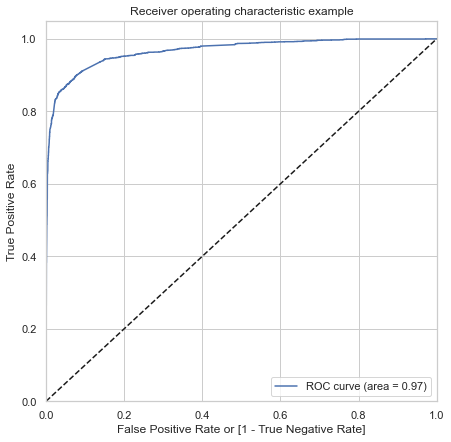

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cut off Point

In [107]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371212  1.000000  0.000000
0.1   0.1  0.826080  0.960921  0.746475
0.2   0.2  0.885719  0.940078  0.853627
0.3   0.3  0.913604  0.900999  0.921046
0.4   0.4  0.916989  0.880591  0.938477
0.5   0.5  0.921986  0.860617  0.958216
0.6   0.6  0.922631  0.838906  0.972058
0.7   0.7  0.910703  0.787668  0.983338
0.8   0.8  0.904417  0.764221  0.987183
0.9   0.9  0.884913  0.701259  0.993335


<Figure size 864x432 with 0 Axes>

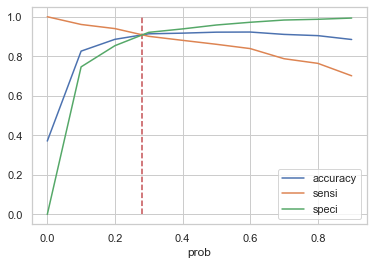

In [109]:
# Plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [110]:
# From the curve above, 0.28 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:
# Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0,22
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1,99
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0,12
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0,8


In [112]:
# Check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9124758220502901

In [113]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3583,  318],
       [ 225, 2078]], dtype=int64)

In [114]:
TP = confusion2[1,1] # True positive 
TN = confusion2[0,0] # True negatives
FP = confusion2[0,1] # False positives
FN = confusion2[1,0] # False negatives

In [115]:
# Check the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9023013460703431


In [116]:
# Calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.9184824403998975


In [117]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.08151755960010254
Positive Predictive rate: 0.8672787979966611
Negative Predictive rate: 0.9409138655462185


In [118]:
# Classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3901
           1       0.87      0.90      0.88      2303

    accuracy                           0.91      6204
   macro avg       0.90      0.91      0.91      6204
weighted avg       0.91      0.91      0.91      6204



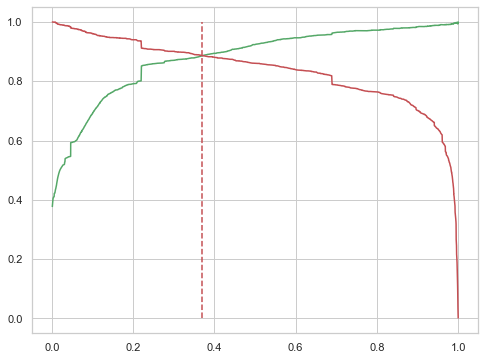

In [119]:
# Precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

0.37 is the tradeoff between Precision and Recall -
Thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 37 % to be a hot Lead

## Step-7: Making Predictions on the Test set

In [120]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8786,0,-1.071483,-0.871984,-1.184151,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7813,0,-0.043681,-0.375183,0.390849,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2405,0,1.326721,0.121618,0.653349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7246,0,-0.043681,-0.508937,0.390849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5366,0,0.984121,0.515238,-0.134151,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [121]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8786,-0.871984,1,0,0,1,0,0,0,0,1,0,1,0
7813,-0.375183,0,0,0,0,0,0,0,0,0,0,1,0
2405,0.121618,0,0,0,0,1,0,0,0,0,1,0,0
7246,-0.508937,0,1,0,0,0,0,0,0,1,0,1,0
5366,0.515238,0,0,0,0,0,0,0,0,0,0,1,0


In [122]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [123]:
# Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8786    0.734386
7813    0.002274
2405    0.993857
7246    0.067348
5366    0.005958
3924    0.046427
3349    0.012550
916     0.010850
7732    0.070307
1703    0.065325
dtype: float64

In [124]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
8786,0.734386
7813,0.002274
2405,0.993857
7246,0.067348
5366,0.005958


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [126]:
# Removing index for both dataframes to append them.
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [127]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,8786,0.734386
1,0,7813,0.002274
2,1,2405,0.993857
3,0,7246,0.067348
4,0,5366,0.005958


In [128]:
# Renaming and Rearranging the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,8786,1,0.734386
1,7813,0,0.002274
2,2405,1,0.993857
3,7246,0,0.067348
4,5366,0,0.005958


In [129]:
# Creating new column "Lead Score" with 1 to 100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,8786,1,0.734386,73
1,7813,0,0.002274,0
2,2405,1,0.993857,99
3,7246,0,0.067348,7
4,5366,0,0.005958,1


In [130]:
# Taking 0.37 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,8786,1,0.734386,73,1
1,7813,0,0.002274,0,0
2,2405,1,0.993857,99,1
3,7246,0,0.067348,7,0
4,5366,0,0.005958,1,0


In [131]:
# Check the overall accuracy.
print("Model Accuracy of Test data: ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy of Test data:  0.9206468597216999


In [132]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1530,   97],
       [ 114,  918]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Check the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.8895348837209303


In [135]:
# Calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.9403810694529809


In [136]:
# Classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1627
           1       0.90      0.89      0.90      1032

    accuracy                           0.92      2659
   macro avg       0.92      0.91      0.92      2659
weighted avg       0.92      0.92      0.92      2659



### Final Observations:

Let us compare the values obtained for Train & Test:

Train Data:
- Accuracy : 92%; Sensitivity : 90%; Specificity : 92%; Precision : 92%; Recall : 86%

Test Data:
- Accuracy : 92%; Sensitivity : 89%; Specificity : 94%; Precision : 90%; Recall : 89%

The Model seems to predict the Conversion Rate very well. We should be able to help the education company select the most promising Leads or the Hot Leads.

## Step-8: Conclusion

In [137]:
## Let us concatinate prediction made on test & train dataset
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df_lead.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of `Lead Number` column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,608267,0,0.219845,22,0,API,Olark Chat,No,0,0,0.0,Email Opened,Others,Unemployed,Others,Mumbai,No,Email Opened
1,584274,1,0.994160,99,1,Landing Page Submission,Google,No,5,1538,2.5,Email Opened,Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,Email Opened
2,615279,0,0.008799,1,0,Landing Page Submission,Direct Traffic,No,2,69,2.0,Email Link Clicked,Management,Unemployed,Try Calling again,Mumbai,Yes,Email Link Clicked
3,616756,0,0.117789,12,0,Landing Page Submission,Direct Traffic,No,3,349,3.0,Email Opened,Management,Unemployed,Others,Mumbai,Yes,Email Opened
4,639772,0,0.081338,8,0,Landing Page Submission,Direct Traffic,No,7,151,1.4,Email Opened,"Banking, Investment And Insurance",Unemployed,Others,Mumbai,No,Email Opened


In [138]:
all_leads.shape

(8863, 18)

### Finding hot leads with a conversion rate of at least 80% (Lead Score)

In [139]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
6679,587979,1,0.996511,100,1,Landing Page Submission,Google,No,4,794,4.0,SMS Sent,Management,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
2048,636208,1,0.995639,100,1,Landing Page Submission,Direct Traffic,No,3,686,3.0,SMS Sent,Rural and Agribusiness,Unemployed,Will revert after reading the email,Other Cities of Maharashtra,Yes,SMS Sent
6750,603637,1,0.999617,100,1,Landing Page Submission,Direct Traffic,No,3,1385,3.0,Email Opened,Management,Student,Closed by Horizzon,Other Cities of Maharashtra,No,Email Opened
2077,586542,1,0.995842,100,1,API,Olark Chat,No,0,0,0.0,SMS Sent,Business Administration,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
3690,635552,1,0.999169,100,1,Landing Page Submission,Direct Traffic,No,5,1487,5.0,SMS Sent,Management,Student,Will revert after reading the email,Mumbai,Yes,SMS Sent


In [140]:
Hot_leads.shape

(2626, 18)

### Connection between the leads and the regression model's final variables

In [141]:
# Concatinating columns from FINAL regression model and lead score on train & test Data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

lead_score = pd.merge(lead_score,df_new_lead[cols].reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
1753,3736,1,0.999980,100,1,0,1,0,0,1,1,1,0,0,0,0,1,0
3598,4044,1,0.995842,100,1,0,0,1,0,0,1,0,0,0,0,1,0,0
8313,6778,1,0.998193,100,1,1112,0,0,0,0,1,0,0,0,0,1,0,0
685,5036,1,0.995842,100,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7775,1991,1,0.999773,100,1,1489,0,0,0,0,1,1,0,0,0,0,1,0


In [142]:
lead_score.shape

(8863, 18)

In [143]:
lead_score.columns

Index(['Lead ID', 'Converted', 'Converted_prob', 'Lead_Score',
       'final_predicted', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

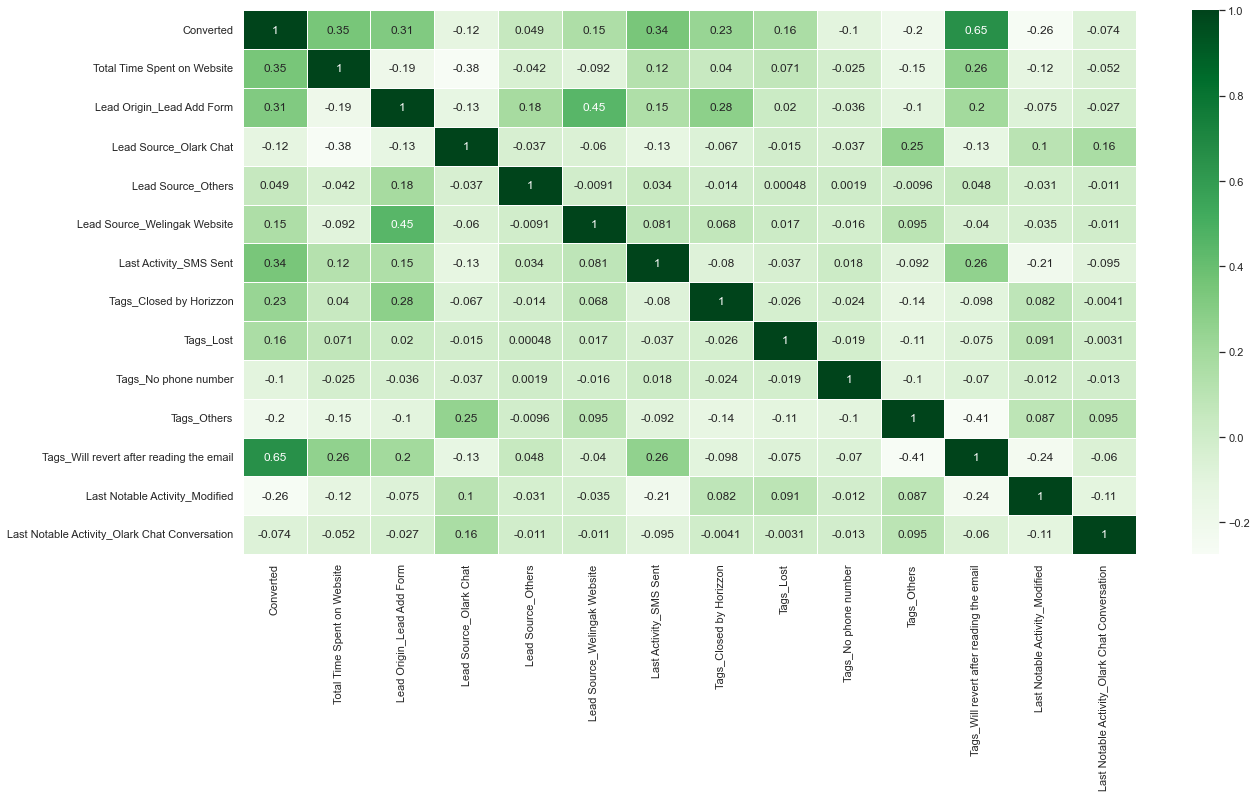

In [144]:
# look at the correaltion between continous varibales using heat map
plt.figure(figsize=(20,10))
sns.heatmap(lead_score[['Converted', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon', 'Tags_Lost',
       'Tags_No phone number', 'Tags_Others',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation']].corr(), annot=True, cmap="Greens", robust=True, linewidth=.5)
plt.show()

***Summary:***
- If the company has limited time and resources, you should turn to Hot_Leads i.e Get the most conversions and avoid wasted calls with prospects who have a conversion probability of 80% or more  .
- If the company has enough resources and time, you should reach out to every prospective customer. But with plenty of time, you should also focus on your low-converting clients to improve your overall lead conversion rate. .